# Feature Creation for a Telecom Churn Dataset #

### Load Libraries ###

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### Let's load up the dataset and prepare the dataframe ###

In [7]:
df = pd.read_csv('churn.csv')
col_names = df.columns.tolist()

print("Column names:")
print(col_names)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [13]:
churn_df = df.iloc[:,[5,9,12,15,18,19,20]]

In [14]:
churn_df.head()

,VMail Plan,Day Charge,Eve Charge,Night Charge,Intl Charge,CustServ Calls,Churn?
0,yes,45.07,16.78,11.01,2.70,1,False.
1,yes,27.47,16.62,11.45,3.70,1,False.
2,no,41.38,10.30,7.32,3.29,0,False.
3,no,50.90,5.26,8.86,1.78,2,False.
4,no,28.34,12.61,8.41,2.73,3,False.


In [15]:
churn_df['vmail'] = np.where(churn_df['VMail Plan']== 'yes', 1, 0) 

In [23]:
churn_df.drop(['VMail Plan'], 1, inplace=True)

In [25]:
churn_df.head()

,Day Charge,Eve Charge,Night Charge,Intl Charge,CustServ Calls,Churn?,vmail,churn
0,45.07,16.78,11.01,2.70,1,False.,1,0
1,27.47,16.62,11.45,3.70,1,False.,1,0
2,41.38,10.30,7.32,3.29,0,False.,0,0
3,50.90,5.26,8.86,1.78,2,False.,0,0
4,28.34,12.61,8.41,2.73,3,False.,0,0


In [24]:
churn_df['churn'] = np.where(churn_df['Churn?']== 'True.', 1, 0) 

In [26]:
churn_df.drop(['Churn?'], 1, inplace=True)

In [27]:
churn_df.head()

,Day Charge,Eve Charge,Night Charge,Intl Charge,CustServ Calls,vmail,churn
0,45.07,16.78,11.01,2.70,1,1,0
1,27.47,16.62,11.45,3.70,1,1,0
2,41.38,10.30,7.32,3.29,0,0,0
3,50.90,5.26,8.86,1.78,2,0,0
4,28.34,12.61,8.41,2.73,3,0,0


In [36]:
churn_df.describe(include='all')

,Day Charge,Eve Charge,Night Charge,Intl Charge,CustServ Calls,vmail,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,30.562307,17.083540,9.039325,2.764581,1.562856,0.276628,0.144914
std,9.259435,4.310668,2.275873,0.753773,1.315491,0.447398,0.352067
min,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,24.430000,14.160000,7.520000,2.300000,1.000000,0.000000,0.000000
50%,30.500000,17.120000,9.050000,2.780000,1.000000,0.000000,0.000000
75%,36.790000,20.000000,10.590000,3.270000,2.000000,1.000000,0.000000
max,59.640000,30.910000,17.770000,5.400000,9.000000,1.000000,1.000000


In [35]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
Day Charge        3333 non-null float64
Eve Charge        3333 non-null float64
Night Charge      3333 non-null float64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
vmail             3333 non-null int64
churn             3333 non-null int64
dtypes: float64(4), int64(3)
memory usage: 182.4 KB


* There is no missing data in the churn_df dataframe 

### Explanation of Variables ###

* 'Day Charge' - Customer charge for calls placed during the day.

* 'Eve Charge" - Customer charge for calls placed during the evening.

* 'Night Charge" - Customer charge for calls placed during the night.

* 'Intl Charge" - Customer charge for international phone calls.

* 'CustServ Calls' - Number of customer service calls placed by customer (Non-negative integer).

* 'vmail' - Customer is a part of the voice mail plan (= 1).

* 'churn' - Our output variable, it represents that the customer has churned (= 1).

### Start Graphing Variables ###

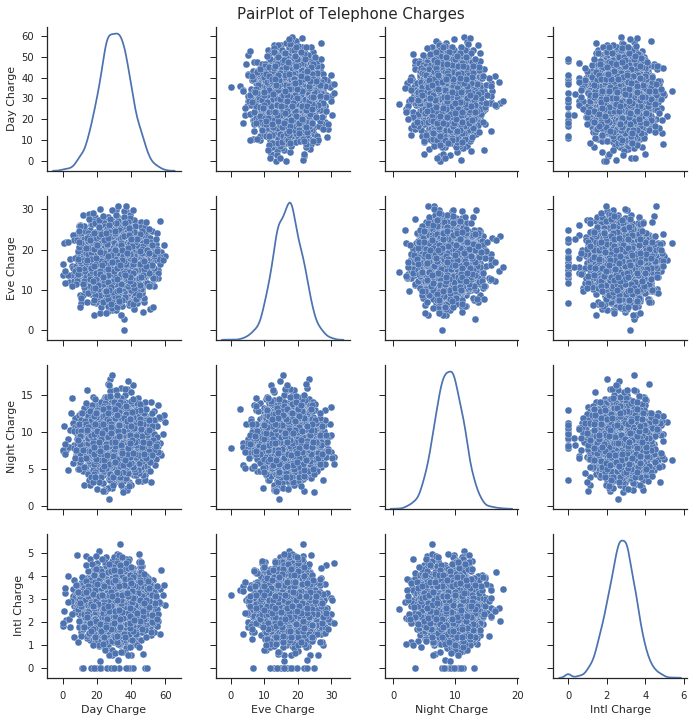

In [33]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(churn_df.iloc[:,[0,1,2,3]], diag_kind="kde")
plt.suptitle('PairPlot of Telephone Charges',fontsize=15,verticalalignment='bottom')
#plt.tight_layout()

plt.show()

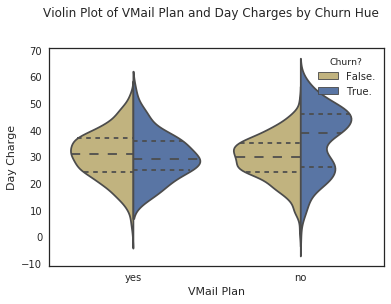

In [47]:
sns.set(style="white")
#plt.suptitle("Violin Plot of VMail Plan and Day Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Day Charge", hue="Churn?", data=df, split="true", inner="quart", palette={"True.": "b","False.": "y"})
plt.suptitle('Violin Plot of VMail Plan and Day Charges by Churn Hue',fontsize=12,verticalalignment='bottom')
plt.show()

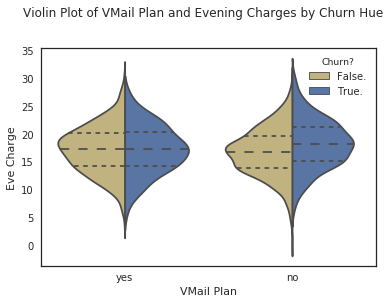

In [48]:
sns.set(style="white")
#plt.suptitle("Violin Plot of VMail Plan and Evening Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Eve Charge", hue="Churn?", data=df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})
plt.suptitle('Violin Plot of VMail Plan and Evening Charges by Churn Hue',fontsize=12,verticalalignment='bottom')
plt.show()

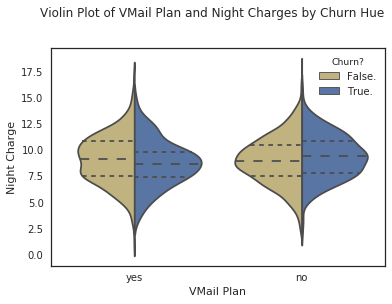

In [49]:
sns.set(style="white")
#plt.suptitle("Violin Plot of VMail Plan and Evening Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Night Charge", hue="Churn?", data=df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})
plt.suptitle('Violin Plot of VMail Plan and Night Charges by Churn Hue',fontsize=12,verticalalignment='bottom')
plt.show()

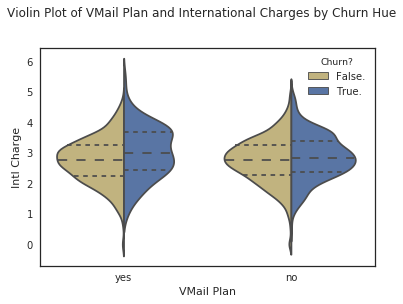

In [50]:
sns.set(style="white")
#plt.suptitle("Violin Plot of VMail Plan and Evening Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Intl Charge", hue="Churn?", data=df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})
plt.suptitle('Violin Plot of VMail Plan and International Charges by Churn Hue',fontsize=12,verticalalignment='bottom')
plt.show()

                Day Charge  Eve Charge  Night Charge  Intl Charge  \
Day Charge        1.000000    0.007036      0.004301    -0.010094   
Eve Charge        0.007036    1.000000     -0.012601    -0.011074   
Night Charge      0.004301   -0.012601      1.000000    -0.015186   
Intl Charge      -0.010094   -0.011074     -0.015186     1.000000   
CustServ Calls   -0.013427   -0.012987     -0.009277    -0.009675   
vmail            -0.001686    0.021559      0.006064    -0.001276   
churn             0.205151    0.092786      0.035496     0.068259   

                CustServ Calls     vmail     churn  
Day Charge           -0.013427 -0.001686  0.205151  
Eve Charge           -0.012987  0.021559  0.092786  
Night Charge         -0.009277  0.006064  0.035496  
Intl Charge          -0.009675 -0.001276  0.068259  
CustServ Calls        1.000000 -0.017824  0.208750  
vmail                -0.017824  1.000000 -0.102148  
churn                 0.208750 -0.102148  1.000000  


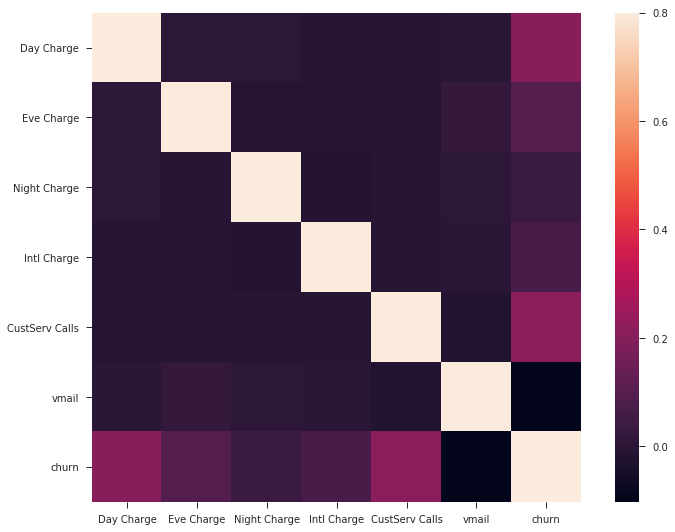

In [37]:
# Make the correlation matrix.
corrmat = churn_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

* Correlations are overall very low (near zero)

* Highest correlation are found between 'Day Charge' and 'CustServ Calls' and 'Churn' 

## Feature Engineering ##

* Previous work on this dataset has shown that the sum of all charges (total revenues) is a useful factor.

* High revenue customers (top quartile) churn a great deal.

* Customers who contact customer service a great deal tend to churn.

* Based on this I propose the following ten features.
    1. Total revenue
    2. Low customer service use (LowCust) dummy variable ('CustServ Calls' < 2)- These people might not be engaged with our company.
    3. High customer service use (HighCust) dummy variable ('CustServ Calls' >= 4) - These people are probably unhappy.
    4. Voice mail plan dummy (vmail) - This data is from a time period where voicemail was a luxury.
    5. High Revenue customer dummy variable (HighRev) defined as total revenue top quartile. - Top users might be picky about service and value.
    6. Interaction terms such as LowCust X HighRev.
    7. HighCust X HighRev
    8. vmail X HighRev
    9. vmail X LowCust
    10. vmail X HighRev X LowCust

In [56]:
churn_df.drop(['totrev'], 1, inplace=True)

In [65]:
features = pd.DataFrame()
features = features.append(churn_df)

In [66]:
features['totrev'] = churn_df['Day Charge'] + churn_df['Eve Charge'] + churn_df['Night Charge'] + churn_df['Intl Charge']

In [67]:
features.head()

,Day Charge,Eve Charge,Night Charge,Intl Charge,CustServ Calls,vmail,churn,totrev
0,45.07,16.78,11.01,2.70,1,1,0,75.56
1,27.47,16.62,11.45,3.70,1,1,0,59.24
2,41.38,10.30,7.32,3.29,0,0,0,62.29
3,50.90,5.26,8.86,1.78,2,0,0,66.80
4,28.34,12.61,8.41,2.73,3,0,0,52.09


In [69]:
features['totrev'].describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: totrev, dtype: float64

In [70]:
features.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'],1, inplace=True)

In [98]:
features['LowCust'] = np.where(features['CustServ Calls'] < 2, 1,0)

In [99]:
features['HighCust'] = np.where(features['CustServ Calls'] > 3, 1,0)

In [100]:
features['HighRev'] = np.where(features['totrev'] > 66, 1,0)

In [101]:
features['LowRev'] = np.where(features['totrev'] < 52, 1,0)

In [102]:
features['LCustHRev'] = np.where((features['LowCust'] == 1) & (features['HighRev'] == 1), 1,0)

In [103]:
features['HCustHRev'] = np.where((features['HighCust'] == 1) & (features['HighRev'] == 1), 1,0)

In [104]:
features['vmailHRev'] = np.where((features['vmail'] == 1) & (features['HighRev'] == 1), 1,0)

In [105]:
features['vmailLCust'] = np.where((features['vmail'] == 1) & (features['LowCust'] == 1), 1,0)

In [106]:
features['vmailHRevLCust'] = np.where((features['vmail'] == 1) & (features['LowCust'] == 1) & (features['HighRev'] == 1), 1,0)

In [107]:
features.describe()

,CustServ Calls,vmail,totrev,LowCust,HighCust,HighRev,LowRev,LCustHRev,HCustHRev,vmailHRev,vmailLCust,vmailHRevLCust,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1.562856,0.276628,59.449754,0.563456,0.080108,0.261026,0.236424,0.150015,0.019802,0.078308,0.161116,0.046805,0.144914
std,1.315491,0.447398,10.502261,0.496031,0.271501,0.439260,0.424949,0.357140,0.139340,0.268696,0.367693,0.211252,0.352067
min,0.000000,0.000000,22.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,52.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,59.470000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,66.480000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,96.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
features.drop(['churn'],1,inplace=True)
features['churn'] = churn_df['churn']

In [109]:
features.head()

,CustServ Calls,vmail,totrev,LowCust,HighCust,HighRev,LowRev,LCustHRev,HCustHRev,vmailHRev,vmailLCust,vmailHRevLCust,churn
0,1,1,75.56,1,0,1,0,1,0,1,1,1,0
1,1,1,59.24,1,0,0,0,0,0,0,1,0,0
2,0,0,62.29,1,0,0,0,0,0,0,0,0,0
3,2,0,66.80,0,0,1,0,0,0,0,0,0,0
4,3,0,52.09,0,0,0,0,0,0,0,0,0,0


In [113]:
correlations = features[features.columns[2:]].corr()['churn'][:-1]

print(correlations)

totrev            0.231549
LowCust          -0.099932
HighCust          0.311804
HighRev           0.232731
LowRev           -0.036495
LCustHRev         0.165990
HCustHRev         0.051607
vmailHRev        -0.069234
vmailLCust       -0.108544
vmailHRevLCust   -0.054906
Name: churn, dtype: float64


In [116]:
(correlations**2).sort_values(ascending=False)

HighCust          0.097221
HighRev           0.054164
totrev            0.053615
LCustHRev         0.027553
vmailLCust        0.011782
LowCust           0.009986
vmailHRev         0.004793
vmailHRevLCust    0.003015
HCustHRev         0.002663
LowRev            0.001332
Name: churn, dtype: float64

* Top 5 features by correlation with churn are:
    1. HighCust - High customer service use probably means they are unhappy customers.
    2. HighRev - High revenue customers want value and service. If they don't get it they will leave.
    3. totrev - Total revenues by itself are highly correlated with churn not just the extreme customers.
    4. LCustHRev - Customers who are both Low customer service users and high revenue tend to churn.
    5. vmailLCust - People on the vmail plan and also low customer service users tend to not churn (corr is negative)